In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
#lets take 0 only to for testing
xtrain_=xtrain[ytrain==0]

In [5]:
xtrain_.shape

(5923, 28, 28)

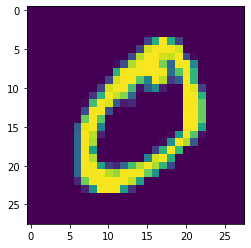

In [6]:
plt.imshow(xtrain_[0])

In [7]:
28*28

784

In [8]:
batch_size=32
generator_starting_value=100
5923//32

185

In [9]:
descriminator=Sequential()
descriminator.add(Flatten(input_shape=[28,28]))
descriminator.add(Dense(500,activation="relu"))
descriminator.add(Dense(300,activation="relu"))
descriminator.add(Dense(generator_starting_value,activation="relu"))
descriminator.add(Dense(1,activation="sigmoid"))
descriminator.compile(optimizer="adam",loss="binary_crossentropy")

In [10]:
generator=Sequential()
generator.add(Dense(generator_starting_value,activation="relu"))
generator.add(Dense(300,activation="relu"))
generator.add(Dense(500,activation="relu"))
generator.add(Dense(784,activation="relu"))
generator.add(Reshape([28,28]))


In [11]:
model=Sequential([generator,descriminator])
descriminator.trainable=False  #imp
model.compile(optimizer="adam",loss="binary_crossentropy")

In [12]:
model.layers[0]

In [13]:
model.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 573,001
Trainable params: 0
Non-trainable params: 573,001
_________________________________________________________________


In [14]:
datasets=tf.data.Dataset.from_tensor_slices(xtrain_).shuffle(buffer_size=1000)

In [15]:
datasets=datasets.batch(batch_size=batch_size,drop_remainder=True)

In [16]:
first_dataset=datasets.prefetch(0)

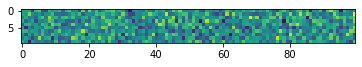

In [17]:
noise =tf.random.normal(shape=[10,100])
noisy_images=generator(noise)
plt.imshow(noise);


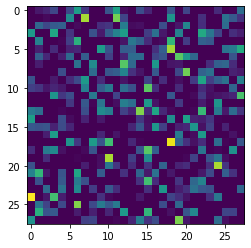

In [18]:
plt.imshow(noisy_images[0]);

In [25]:
epochs=4

In [26]:
for ep in range(epochs):
    print("current=> epoch", ep)
    i=0
    for batch_data in datasets:
        i=i+1
        if i%20==0:
            print("current batch=> ", i)
        noise=tf.random.normal(shape=[batch_size,generator_starting_value])
        input_values=generator(noise)
        fake_real_images=tf.concat([input_values,tf.dtypes.cast(batch_data,tf.float32)],axis=0)
        y=tf.constant([[0]]*batch_size+[[1]]*batch_size)
#         descriminator.trainable=True
        descriminator.train_on_batch(fake_real_images,y)
        
        noise1=tf.random.normal(shape=[batch_size,generator_starting_value])
        y1=tf.constant([[1]]*batch_size)
#         descriminator.trainable=False
        model.train_on_batch(noise1,y1)
        


current=> epoch 0
current batch=>  20
current batch=>  40
current batch=>  60
current batch=>  80
current batch=>  100
current batch=>  120
current batch=>  140
current batch=>  160
current batch=>  180
current=> epoch 1
current batch=>  20
current batch=>  40
current batch=>  60
current batch=>  80
current batch=>  100
current batch=>  120
current batch=>  140
current batch=>  160
current batch=>  180
current=> epoch 2
current batch=>  20
current batch=>  40
current batch=>  60
current batch=>  80
current batch=>  100
current batch=>  120
current batch=>  140
current batch=>  160
current batch=>  180
current=> epoch 3
current batch=>  20
current batch=>  40
current batch=>  60
current batch=>  80
current batch=>  100
current batch=>  120
current batch=>  140
current batch=>  160
current batch=>  180


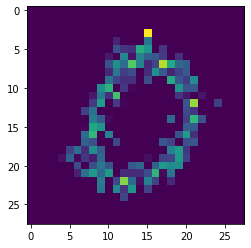

In [27]:
noise =tf.random.normal(shape=[10,100])
noisy_images=generator(noise)
plt.imshow(noisy_images[0])